# Loading the dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd /content/drive/My Drive

/content/drive/My Drive


In [5]:
path = '/content/drive/My Drive/datafiniti_amazon_consumer_reviews_of_amazon_products.csv'

In [6]:
dataset = pd.read_csv(path)
df=dataset[['reviews_text','reviews_rating']]

# Data Preprocessing

## Lower casing

In [7]:
df['reviews_text'] = df['reviews_text'].str.lower()
df['reviews_text']

<ipython-input-7-d9506f2c2611>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews_text'] = df['reviews_text'].str.lower()


0       i thought it would be as big as small paper bu...
1       this kindle is light and easy to use especiall...
2       didnt know how much i'd use a kindle so went f...
3       i am 100 happy with my purchase. i caught it o...
4       solid entry level kindle. great for kids. gift...
                              ...                        
4995    this is a great tablet for the price. amazon i...
4996    this tablet is the perfect size and so easy to...
4997    purchased this for my son. has room to upgrade...
4998    i had some thoughts about getting this for a 5...
4999    this is a steal, have 8 gb model as well.this ...
Name: reviews_text, Length: 5000, dtype: object

## Removing punctuation 

In [8]:
import string

In [9]:
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

df['reviews_text'] = df['reviews_text'].apply(lambda text: remove_punctuation(text))

<ipython-input-9-0e0498356856>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews_text'] = df['reviews_text'].apply(lambda text: remove_punctuation(text))


## Removing stopwords

In [10]:
import nltk
from nltk.corpus import stopwords

In [11]:
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
df['reviews_text'] = df['reviews_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

<ipython-input-12-9edef2cdf366>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reviews_text'] = df['reviews_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


## Lemmatization

In [13]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [14]:
lemmatizer = WordNetLemmatizer()

In [15]:
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df["reviews_text"] = df["reviews_text"].apply(lambda text: lemmatize_words(text))

<ipython-input-15-8989a41250f9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["reviews_text"] = df["reviews_text"].apply(lambda text: lemmatize_words(text))


## Encoding

In [16]:
from sklearn.preprocessing import OrdinalEncoder

In [17]:
y = np.array(df['reviews_rating'])

In [18]:
y

array([3, 5, 4, ..., 4, 5, 5])

In [19]:
y = y.reshape(-1, 1)
encoder = OrdinalEncoder(categories=[["1", "2", "3", "4", "5"]])
y_encoded = encoder.fit_transform(y)

In [20]:
y_encoded

array([[2.],
       [4.],
       [3.],
       ...,
       [3.],
       [4.],
       [4.]])

#BERT

In [21]:
!pip install transformers
#from transformers import TFAutoModelForSequenceClassification, AutoTokenizer
from sklearn.model_selection import train_test_split

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 61.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 117.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 26.6 MB/s eta 0:00:00


In [35]:
from transformers import BertTokenizer, TFBertModel,TFBertForSequenceClassification

## Splitting the dataset

In [36]:
X_train, X_test, y_train, y_test = train_test_split(df["reviews_text"],y_encoded, stratify= y_encoded, test_size=0.2, random_state=42)

## Loading the BERT Model

In [37]:
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')

In [38]:
# Load and tokenize the BERT model
"""
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
bert_model = TFAutoModelForSequenceClassification.from_pretrained(model_name, num_labels=5)"""

'\nmodel_name = "bert-base-uncased"\ntokenizer = AutoTokenizer.from_pretrained(model_name)\nbert_model = TFAutoModelForSequenceClassification.from_pretrained(model_name, num_labels=5)'

## Preparing the data

In [39]:
train_encodings = tokenizer(X_train.tolist(), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(X_test.tolist(), truncation=True, padding=True, max_length=128)

In [40]:
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings),y_train.astype(int).tolist()))
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings),y_test.astype(int).tolist()))

## Modeling

In [41]:
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

## Training

In [42]:
history = model.fit(train_dataset.shuffle(100).batch(16), epochs=3, batch_size=16,validation_data=test_dataset.shuffle(100).batch(16))

Epoch 1/3
250/250 [==============================] - 166s 471ms/step - loss: 0.6038 - accuracy: 0.7710 - val_loss: 0.7266 - val_accuracy: 0.7130
Epoch 2/3
250/250 [==============================] - 110s 442ms/step - loss: 0.4602 - accuracy: 0.8335 - val_loss: 0.7802 - val_accuracy: 0.7230
Epoch 3/3
250/250 [==============================] - 111s 444ms/step - loss: 0.3425 - accuracy: 0.8885 - val_loss: 0.8484 - val_accuracy: 0.7200


# Evaluation and accuracy visualization

In [45]:
# evaluating the model
test_loss, test_acc = model.evaluate(test_dataset.batch(10))
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

100/100 [==============================] - 10s 103ms/step - loss: 0.8484 - accuracy: 0.7200
Test loss: 0.8483724594116211
Test accuracy: 0.7200000286102295


<Axes: >

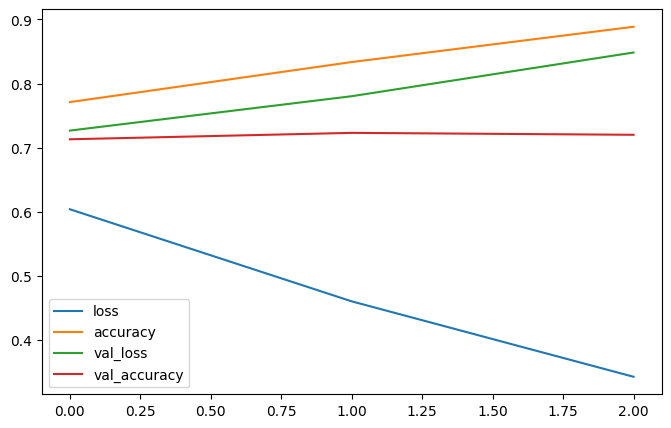

In [46]:
pd.DataFrame(history.history).plot(figsize=(8,5))